## Foundations of Data Science: Computational Thinking with Python

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lectures 8 and 9a: Histograms

**Area principal** - Areas in data visualization should be proportional to the values they represent (i.e. if using a triangle to represent 20% of the populations, it is misrepresentative to double the edges of that triangle to represent 40% since doubling the edges will create a triangle that can hold 4 of the first. Instead it would be best to use two of the origional triangle)

**pd.cut** - Used for binning data in a pandas Series

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')
pd.set_option('max_rows', 9)

In [2]:
top_movies = pd.read_csv('data/top_movies.csv')
#top_movies

In [3]:
# Looking at distribution of top movies by age
top_movies['Age'] = 2017 - top_movies.Year
print(top_movies['Age'].describe())  # Use summary data to help select bin sizes

# pd.cut to bin data
bins = [0, 5, 10, 15, 25, 40, 65, 100]
pd.cut(top_movies.Age, bins=bins, right=False)
display(pd.cut(top_movies.Age, bins=bins, right=False).value_counts().sort_index())

count    200.000000
mean      30.380000
std       20.493548
min        2.000000
25%       13.750000
50%       27.000000
75%       44.000000
max       96.000000
Name: Age, dtype: float64


[0, 5)       13
[5, 10)      20
[10, 15)     22
[15, 25)     38
[25, 40)     42
[40, 65)     53
[65, 100)    12
Name: Age, dtype: int64

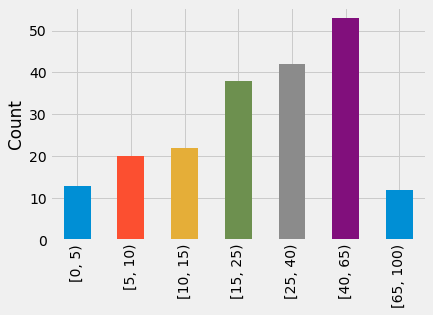

In [4]:
# Bar chart - pd.cut bins counts
#  Doesn't show how bin size changes (except as noted in label)
pd.cut(top_movies.Age, bins=bins, right=False).value_counts().sort_index().plot.bar()
plt.ylabel('Count')
plt.show()
plt.close()

<Figure size 432x288 with 0 Axes>

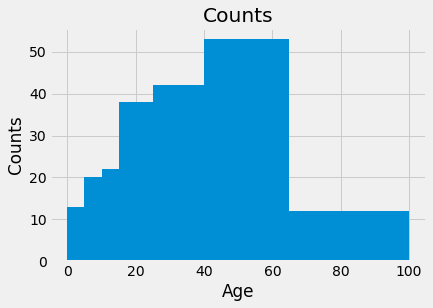

<Figure size 432x288 with 0 Axes>

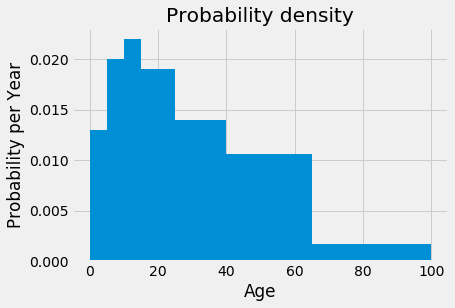

In [5]:
# Pandas histogram - Counts
#  Bin width changes with bin size while y-axis is a count of each bin, resulting 
#  in a plot that violates the area principle as wider binds have greater area
plt.figure()
ax = top_movies.hist('Age', bins=bins)
ax = ax[0][0]  # Not sure why axis is in an array of arrays
ax.set_ylabel('Counts')
ax.set_xlabel('Age')
ax.set_title('Counts')

# Pandas histogram - Normalized
#  Area principle met
bins = [0, 5, 10, 15, 25, 40, 65, 100]
plt.figure()
ax = top_movies.hist('Age', bins=bins, density=True)
ax = ax[0][0]  # Not sure why axis is in an array of arrays
ax.set_ylabel('Probability per Year')
ax.set_xlabel('Age')
ax.set_title('Probability density')

plt.show()
plt.close()

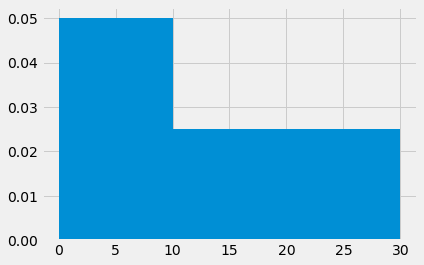

0.05
0.025
1.0
6.960000000000001


In [6]:
# Troubleshooting unexpected results from normalized histograms. 
# Turned out to be a bug in matplotlib that was fixed on updating
plt.figure()
bins_test = [0, 10, 30]
x_test = [1, 11]
plt.hist(x_test, bins=bins_test, density=True)
plt.show()

# expected
print(1 / (2 * 10)) # = 0.05
print(1 / (2 * 20)) # = 0.25
print(0.05 * 10 + 0.025 * 20)  # 1.0

# initially received
print(0.66 * 10 + 0.018 * 20)

/home/paul/Software/anaconda2/envs/ds36_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


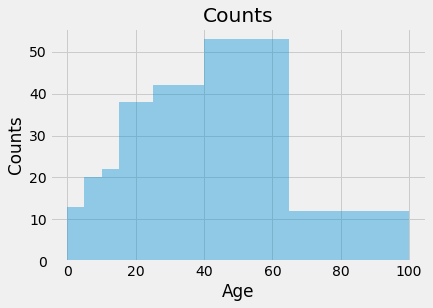

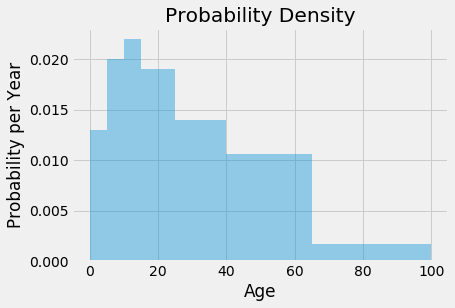

In [7]:
# Seaborn histogram - Counts
plt.figure()
ax = sns.distplot(top_movies.Age, bins=bins, kde=False)
ax.set_ylabel('Counts')
ax.set_title('Counts')

# Seaborn histogram - Normalized
plt.figure()
ax = sns.distplot(top_movies.Age, bins=bins, kde=False, norm_hist=True)
ax.set_ylabel('Probability per Year')
ax.set_title('Probability Density')

plt.show()

<Figure size 432x288 with 0 Axes>

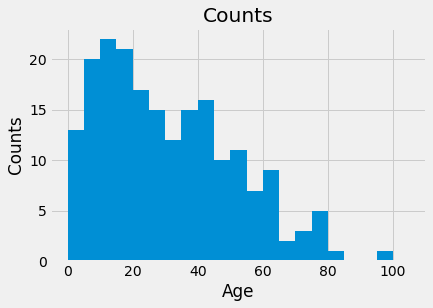

<Figure size 432x288 with 0 Axes>

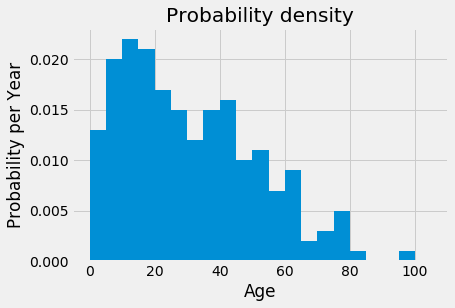

In [8]:
# Narrow, evenly spaced bins
#  Does not violate area principle, though level of detail may make it harder to read
#  Depending on the data and regions of interest, a suitable constant width might be found
# Pandas histogram - Counts
bins = np.arange(0, 110, 5)
plt.figure()
ax = top_movies.hist('Age', bins=bins)
ax = ax[0][0]  # Not sure why axis is in an array of arrays
ax.set_ylabel('Counts')
ax.set_xlabel('Age')
ax.set_title('Counts')

# Pandas histogram - Normalized
plt.figure()
ax = top_movies.hist('Age', bins=bins, density=True)
ax = ax[0][0]  # Not sure why axis is in an array of arrays
ax.set_ylabel('Probability per Year')
ax.set_xlabel('Age')
ax.set_title('Probability density')

plt.show()
plt.close()

(0, 25]      96
(25, 50]     68
(50, 75]     30
(75, 100]     6
Name: Age, dtype: int64

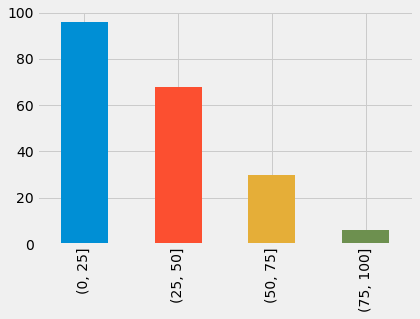

In [9]:
bins = np.arange(0, 101, 25)
pd.cut(top_movies.Age, bins=bins)
display(pd.cut(top_movies.Age, bins=bins).value_counts().sort_index())
pd.cut(top_movies.Age, bins=bins).value_counts().sort_index().plot.bar()
plt.show()

                            Title  Age
133               The Jungle Book   50
153                  The Graduate   50
179  Guess Who's Coming to Dinner   50


[0, 25)     93
[25, 50)    68
Name: Age, dtype: int64

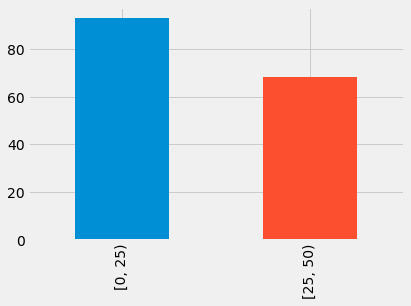

In [10]:
# Not including entire range of data to focus on region of interest
# With datascience module this caused 50 to be included in [25, 50) 
# not an issue with pd.cut but appears when using df.hist.
print(top_movies[['Title', 'Age']].loc[top_movies.Age == 50])
bins = np.arange(0, 60, 25)
pd.cut(top_movies.Age, bins=bins, right=False)
display(pd.cut(top_movies.Age, bins=bins, right=False).value_counts().sort_index())
pd.cut(top_movies.Age, bins=bins, right=False).value_counts().sort_index().plot.bar()
plt.show()

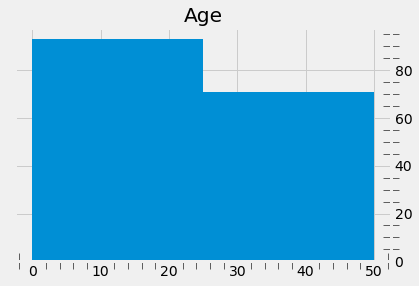

In [11]:
ax = top_movies.hist('Age', bins=bins)
ax[0][0].yaxis.tick_right()
ax[0][0].yaxis.set_label_position("right")
#ax[0][0].yaxis.set_tick_params(which='minor')
plt.tick_params(which='minor', length=16, direction='inout')
plt.minorticks_on()
plt.show()

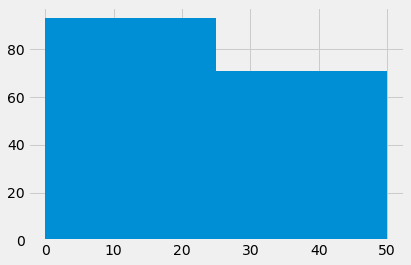

[93. 71.]


In [12]:
ns, bins, patches = plt.hist(top_movies.Age.values, bins=bins)
plt.show()
print(ns) # Counts per cell

<Figure size 432x288 with 0 Axes>

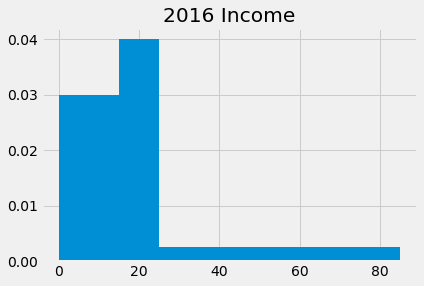

In [13]:
incomes = pd.read_csv('data/incomes.csv')
incomes.describe()
plt.figure()
incomes.hist('2016 Income', bins = [0, 15, 25, 85], density=True)
plt.show()

### Comparing histograms - Lecture 9a: 

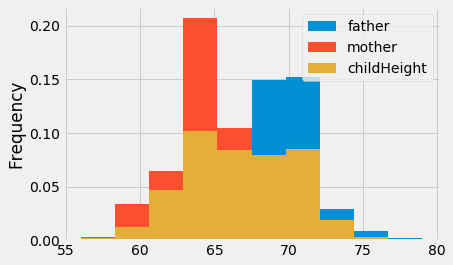

In [24]:
# Overlayed histograms
galton = pd.read_csv('data/galton.csv')

galton.loc[:, ['father', 'mother', 'childHeight']].plot.hist(density=True)
plt.show()

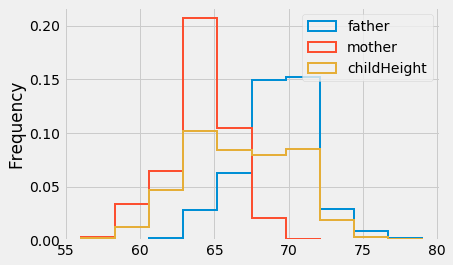

In [29]:
# Overlayed histograms
galton = pd.read_csv('data/galton.csv')

galton.loc[:, ['father', 'mother', 'childHeight']].plot.hist(
                                                density=True, 
                                                histtype='step',
                                                lw=2)
plt.show()

/home/paul/Software/anaconda2/envs/ds36_env/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


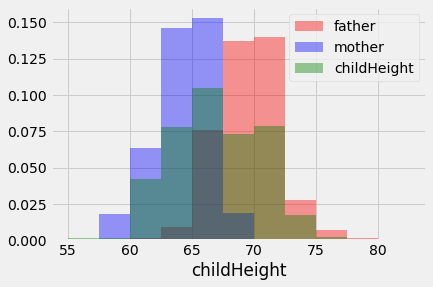

In [49]:
# Seaborn histogram - overlay
bins = np.arange(55, 85, 2.5)
cols = ['father', 'mother', 'childHeight']
colors = ['red', 'blue', 'green']

for col, color in zip(cols, colors):
    sns.distplot(galton.loc[:, col],
                 color=color,
                 bins=bins,
                 label=col,
                 norm_hist=True, 
                 kde=False)
plt.legend()
plt.show()